# PS6

## Siyuan Peng

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

## 1

## (a)

In [2]:
df = pd.read_csv('data/strongdrink.txt', na_values='?')
df.head(10)

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
# Show the number of observations for each category.
print(df.cultivar.value_counts())

2    71
1    59
3    46
Name: cultivar, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X = df[['alco', 'malic', 'tot_phen', 'color_int']]
y = df.cultivar
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.25, random_state=20)
LogReg = LogisticRegression(random_state=20, solver='lbfgs',multi_class='multinomial', max_iter=5000)
result = LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
print(classification_report(y_test, y_pred))
print("Intercept of j = 1 and 2 are ", result.intercept_[0],'and', result.intercept_[1])
print("Coefficients of j = 1 and 2 are ", result.coef_[0],'and', result.coef_[1])

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        13
           2       1.00      0.90      0.95        21
           3       1.00      1.00      1.00        10

   micro avg       0.95      0.95      0.95        44
   macro avg       0.96      0.97      0.96        44
weighted avg       0.96      0.95      0.96        44

Intercept of j = 1 and 2 are  -24.027621468119282 and 22.780737290698724
Coefficients of j = 1 and 2 are  [ 1.70173527 -0.26578815  1.22410115  0.0225061 ] and [-1.46629733 -0.33295295  0.66355609 -0.92268161]


From the above result, the error rates for j = 1, 2, 3 are 0.13, 0 and 0, respectively. According to the F1 score, j = 3 is the most accurate one and it's not the one with most observations.

In [5]:
MSE_t = ((y_test - y_pred) ** 2).sum() / y_pred.shape[0]
print('Test set MSE = ', MSE_t)

Test set MSE =  0.045454545454545456


## (b)

In [6]:
from sklearn.model_selection import LeaveOneOut
Xvars = df[['alco', 'malic', 'tot_phen', 'color_int']].values
yvars = df['cultivar'].values
N_loo = Xvars.shape[0]
loo = LeaveOneOut()
loo.get_n_splits(Xvars)
MSE_vec = np.zeros(N_loo)
y_test_lst = np.zeros(N_loo)
y_pred_lst = np.zeros(N_loo)
for train_index, test_index in loo.split(Xvars):
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_pred_lst[test_index] = y_pred
    y_test_lst[test_index] = y_test
    MSE_vec[test_index] = (y_test != y_pred)
    print('MSE for test set', test_index, ' is', MSE_vec[test_index])

MSE for test set [0]  is [0.]
MSE for test set [1]  is [0.]
MSE for test set [2]  is [0.]
MSE for test set [3]  is [0.]
MSE for test set [4]  is [0.]
MSE for test set [5]  is [0.]
MSE for test set [6]  is [0.]
MSE for test set [7]  is [0.]
MSE for test set [8]  is [0.]
MSE for test set [9]  is [0.]
MSE for test set [10]  is [0.]
MSE for test set [11]  is [1.]
MSE for test set [12]  is [0.]
MSE for test set [13]  is [0.]
MSE for test set [14]  is [0.]
MSE for test set [15]  is [0.]
MSE for test set [16]  is [0.]
MSE for test set [17]  is [0.]
MSE for test set [18]  is [0.]
MSE for test set [19]  is [0.]
MSE for test set [20]  is [0.]
MSE for test set [21]  is [1.]
MSE for test set [22]  is [1.]
MSE for test set [23]  is [1.]
MSE for test set [24]  is [1.]
MSE for test set [25]  is [1.]
MSE for test set [26]  is [0.]
MSE for test set [27]  is [1.]
MSE for test set [28]  is [0.]
MSE for test set [29]  is [0.]
MSE for test set [30]  is [0.]
MSE for test set [31]  is [0.]
MSE for test set [

In [7]:
print(classification_report(y_test_lst, y_pred_lst))

              precision    recall  f1-score   support

         1.0       0.84      0.78      0.81        59
         2.0       0.83      0.89      0.86        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.86      0.86      0.86       176
   macro avg       0.87      0.87      0.87       176
weighted avg       0.86      0.86      0.86       176



From the above result, the error rates for j = 1, 2, 3 are 0.16, 0.17 and 0.04, respectively. Compared with the method of (a), the LOOCV's error rate is higher.

In [8]:
MSE_loo = MSE_vec.mean()
MSE_loo_std = MSE_vec.std()
print('test estimate MSE loocv=', MSE_loo,
      ', test estimate MSE standard err=', MSE_loo_std)

test estimate MSE loocv= 0.13636363636363635 , test estimate MSE standard err= 0.3431742925123068


## (c)

In [9]:
from sklearn.model_selection import KFold
k = 4
kf = KFold(k, shuffle=True, random_state=10)
kf.get_n_splits(Xvars)
MSE_vec_kf = np.zeros(k)
y_test_lst2 = np.zeros(N_loo)
y_pred_lst2 = np.zeros(N_loo)

k_ind = int(0)
for train_index, test_index in kf.split(Xvars):
    print('k index=', k_ind)
    X_train, X_test = Xvars[train_index], Xvars[test_index]
    y_train, y_test = yvars[train_index], yvars[test_index]
    LogReg = LogisticRegression()
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    y_test_lst2[test_index] = y_test
    y_pred_lst2[test_index] = y_pred
    MSE_vec_kf[k_ind] = (y_test != y_pred).mean()
    print('MSE for test set', k_ind, ' is', MSE_vec_kf[k_ind])
    k_ind += 1

print(classification_report(y_test_lst2, y_pred_lst2))

k index= 0
MSE for test set 0  is 0.22727272727272727
k index= 1
MSE for test set 1  is 0.22727272727272727
k index= 2
MSE for test set 2  is 0.13636363636363635
k index= 3
MSE for test set 3  is 0.09090909090909091
              precision    recall  f1-score   support

         1.0       0.78      0.73      0.75        59
         2.0       0.79      0.85      0.82        71
         3.0       0.96      0.93      0.95        46

   micro avg       0.83      0.83      0.83       176
   macro avg       0.84      0.84      0.84       176
weighted avg       0.83      0.83      0.83       176



From the above result, the error rates for j = 1, 2, 3 are 0.22, 0.21 and 0.04, respectively. Compared with the methods of (a) and (b), the error rate of k-fold estimate is the highest.

In [10]:
MSE_kf = MSE_vec_kf.mean()
MSE_kf_std = MSE_vec_kf.std()
print('test estimate MSE k-fold=', MSE_kf,
      'test estimate MSE standard err=', MSE_kf_std)

test estimate MSE k-fold= 0.17045454545454544 test estimate MSE standard err= 0.05904718662166627


## 2

## (a)

In [11]:
df = pd.read_csv('data/CoolIndex.txt', header=None, names=['Age', 'CoolIndex'])
df.head(10)

,Age,CoolIndex
0,11.0,10.981602
1,11.0,11.364925
2,11.0,10.190227
3,11.0,9.903725
4,11.0,8.997918
5,11.0,9.882644
6,11.0,9.658151
7,11.0,10.643767
8,11.0,9.975599
9,11.0,8.570520


<IPython.core.display.Javascript object>


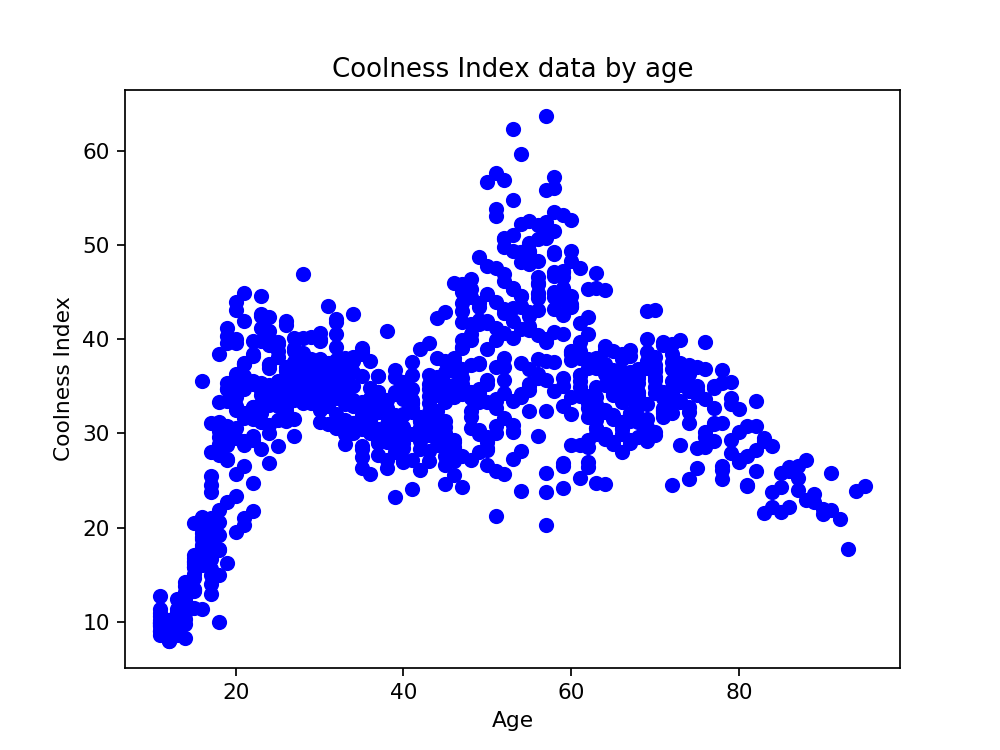

Text(0.5, 1.0, 'Coolness Index data by age')

In [23]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='blue')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.title('Coolness Index data by age')

## (b)

In [13]:
y1 = df.CoolIndex[(df.Age>=11) & (df.Age<22)]
y2 = df.CoolIndex[(df.Age>=22) & (df.Age<40)]
y3 = df.CoolIndex[(df.Age>=40) & (df.Age<59)]
y4 = df.CoolIndex[(df.Age>=59) & (df.Age<77)]
y5 = df.CoolIndex[(df.Age>=77) & (df.Age<=95)]
cool_bin = []
for y in [y1,y2,y3,y4,y5]:
    X = np.ones(y.shape[0]).reshape(-1,1)
    model = sm.OLS(y, X)
    result = model.fit()
    cool_bin.append(result.params[0])

In [14]:
cool_bin

[20.102457252090744,
 34.47578807755938,
 37.635105492449604,
 35.22540004024275,
 27.296378244321282]

<IPython.core.display.Javascript object>


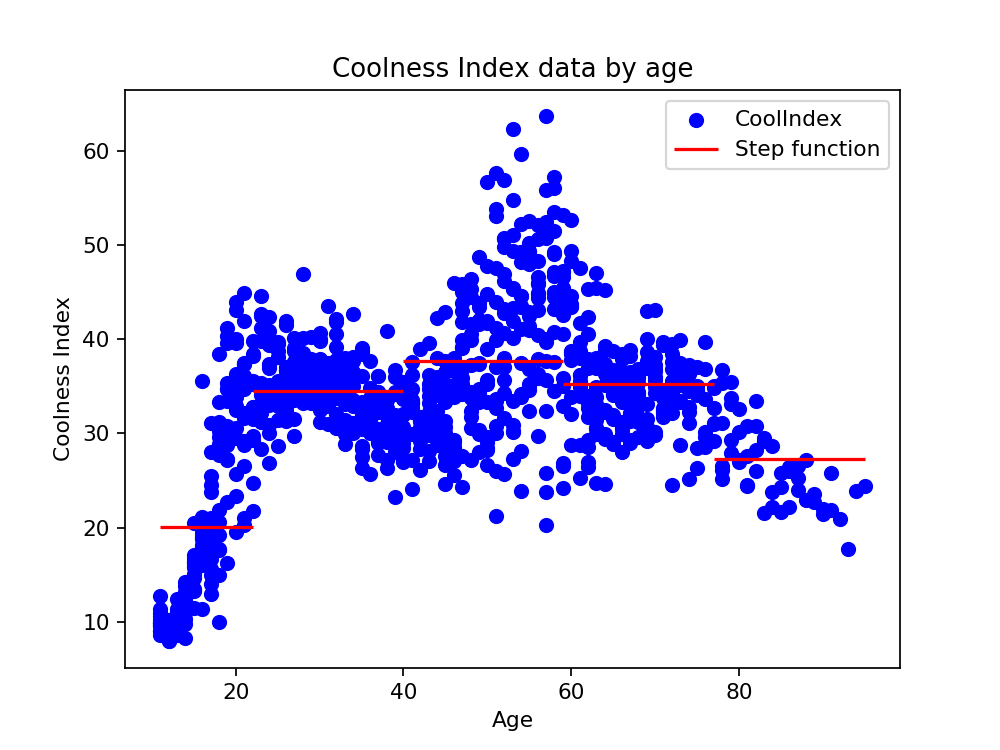

Text(0.5, 1.0, 'Coolness Index data by age')

In [24]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='blue')
lower_age = np.array([11, 22, 40, 59, 77])
upper_age = np.array([22, 40, 59, 77, 95])
plt.hlines(cool_bin, lower_age, upper_age, color='red', label='Step function')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')

In [16]:
print('The predicted coolness index of a 73-year-old person from the stepwise function is', round(cool_bin[3],2))

The predicted coolness index of a 73-year-old person from the stepwise function is 35.23


## (c)

In [17]:
from scipy.interpolate import LSQUnivariateSpline
t = np.array([22.0,40.0,59, 77.0])
df.sort_index(0, ascending=True, inplace=True)
grouped = df.groupby('Age', as_index = False).mean()
lin_spl = LSQUnivariateSpline(grouped.Age.values, grouped.CoolIndex.values, t, k=1)
age_vec = np.linspace(11,95,1000)

<IPython.core.display.Javascript object>


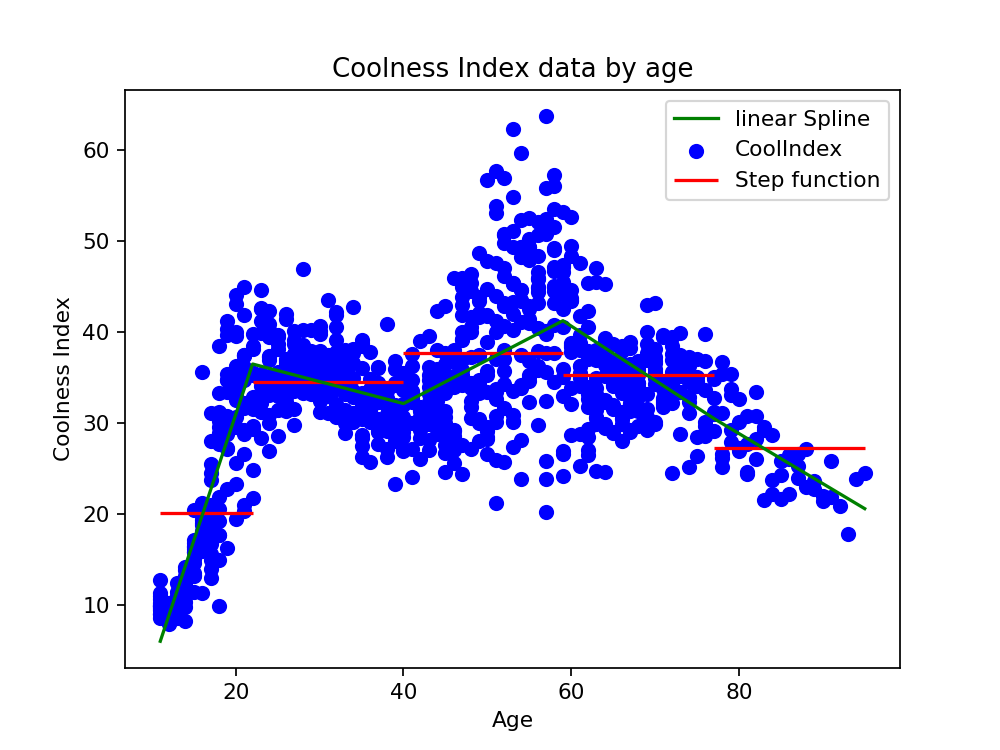

Text(0.5, 1.0, 'Coolness Index data by age')

In [25]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='blue')
plt.hlines(cool_bin, lower_age, upper_age, color='red', label='Step function')
plt.plot(age_vec, lin_spl(age_vec), color='green', label='linear Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')

In [19]:
print('The predicted coolness index of a 73-year-old person from the linear spline is', round(float(lin_spl(73)),2))

The predicted coolness index of a 73-year-old person from the linear spline is 32.87


## (d)

In [20]:
cub_spl = LSQUnivariateSpline(grouped.Age.values, grouped.CoolIndex.values, t, k=3)

<IPython.core.display.Javascript object>


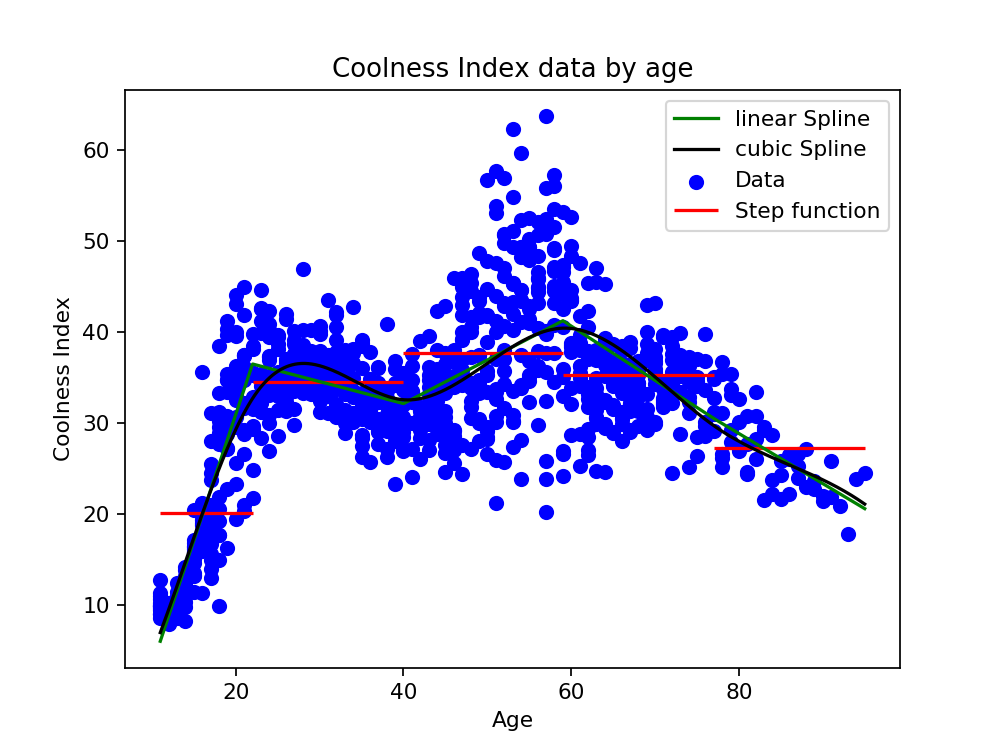

Text(0.5, 1.0, 'Coolness Index data by age')

In [21]:
%matplotlib notebook
plt.scatter(df.Age, df.CoolIndex, color='blue', label='Data')
plt.hlines(cool_bin, lower_age, upper_age, color='red', label='Step function')
plt.plot(age_vec, lin_spl(age_vec), color='green', label='linear Spline')
plt.plot(age_vec, cub_spl(age_vec), color='black', label='cubic Spline')
plt.xlabel('Age')
plt.ylabel('Coolness Index')
plt.legend(loc='upper right')
plt.title('Coolness Index data by age')

In [22]:
print('The predicted coolness index of a 73-year-old person from the cubic spline is', round(float(cub_spl(73)),2))

The predicted coolness index of a 73-year-old person from the cubic spline is 32.64
